In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
dos_csv = os.path.join('data', 'Other Companies.csv')

In [3]:
df = pd.read_csv(dos_csv)

In [4]:
df = df[['Company Trimmed']]

In [5]:
len(df)

487

In [6]:
df.drop_duplicates(subset=['Company Trimmed'], keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
len(df)

442

In [8]:
#normal distribution
mu, sigma = 25000, 11000
profit_arr = np.random.normal(loc=mu, scale=sigma, size=len(df)).round(2)
profit_df = pd.DataFrame(profit_arr, columns=['Profit'])

In [9]:
#Display the histogram of the samples, along with the probability density function:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(profit_arr, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [10]:
#uniform distribution
headcount_df = pd.DataFrame(np.random.randint(5,1000,size=(len(df), 1)), columns=['Headcount'])

In [11]:
#exponential distribution
revenue_arr = np.random.exponential(2500000,size=(len(df))).round(2)
revenue_df = pd.DataFrame(revenue_arr, columns=['Revenue'])

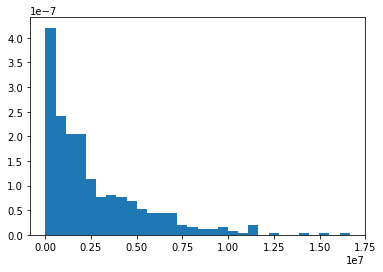

In [12]:
count, bins, ignored = plt.hist(revenue_arr, 30, normed=True)

In [13]:
companies_df = pd.concat([df, profit_df, headcount_df, revenue_df], axis=1)

In [14]:
companies_df.head()

,Company Trimmed,Profit,Headcount,Revenue
0,MAPLES SA,5516.72,736,1706667.19
1,TRANSOIL SNG LIMITED COMPANY,24859.95,901,1649448.21
2,BANK ROSSIYA,8347.57,842,3595945.98
3,GROUP OF COMPANIES TITAN JOINT STOCK COMPANY,22994.87,473,975670.41
4,BASH-TITAN COMPANY LTD,32583.89,989,4031581.19


In [15]:
profiles_csv = os.path.join('data', 'profiles.csv')

In [16]:
companies_df.to_csv(profiles_csv, index=False, encoding="utf-8-sig")

In [43]:
g5_src = os.path.join('data', 'DOS_titanagro_g5_edited.csv')
profiles_e_src = os.path.join('data', 'profiles_edited.csv')

In [45]:
g5_df = pd.read_csv(g5_src)
profiles_e_df = pd.read_csv(profiles_e_src)

In [46]:
g5profiles_df = g5_df.merge(profiles_e_df, how='left', on='Company Trimmed')

In [47]:
profiles_e_df.loc[profiles_e_df['Company Trimmed'] == 'AMERICAN LUXURY PTE. LTD.']

,Company Trimmed,Profit,Headcount,Revenue
3,AMERICAN LUXURY PTE. LTD.,31920.84,68,3139407.56


In [48]:
g5profiles_df.loc[g5profiles_df['Revenue'].isnull()]

,Company Trimmed,ParentCompany,g1parent,g2parent,g3parent,g4parent,is_gx_child,is_gx_parent,titanagro_g5,Hirerarchy,Profit,Headcount,Revenue


In [49]:
g5profiles_df.to_csv(os.path.join('data', 'DOS_g5profiles.csv'))